# Obtenção dos dados de índice de refração já pré-processados (dados_nd)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.utils import shuffle
import umap.umap_ as umap
import hdbscan
import math
import pickle

In [2]:
dados_nd = pd.read_csv("data_nd.csv")
dados_nd

,ID,Li,Be,B,O,Na,Mg,Al,Si,P,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,602035_43254,0.0,0.0,0.200000,0.515151,0.151515,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.118
1,602033_43254,0.0,0.0,0.245714,0.542857,0.085714,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.133
2,602034_43254,0.0,0.0,0.223529,0.529412,0.117647,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.147
3,427658_35592,0.0,0.0,0.219780,0.593407,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.032967,0.153846,0.0,0.0,1.230
4,359894_27785,0.0,0.0,0.000000,0.571429,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.135714,0.285714,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,484100_42384,0.0,0.0,0.067604,0.640714,0.000000,0.0,0.000000,0.034143,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.978
50826,610519_44747,0.0,0.0,0.000000,0.626050,0.025210,0.0,0.037815,0.000000,0.184874,...,0.0,0.0,0.0,0.0,0.0,0.046218,0.000000,0.0,0.0,2.980
50827,610520_44747,0.0,0.0,0.000000,0.626305,0.025052,0.0,0.037578,0.000000,0.183716,...,0.0,0.0,0.0,0.0,0.0,0.043841,0.000000,0.0,0.0,3.470
50828,610518_44747,0.0,0.0,0.000000,0.625922,0.025290,0.0,0.037935,0.000000,0.185458,...,0.0,0.0,0.0,0.0,0.0,0.047418,0.000000,0.0,0.0,3.670


In [3]:
dados_nd_train = pd.read_csv("data_nd_train.csv")
dados_nd_test = pd.read_csv("data_nd_test.csv")
print(dados_nd_train)
print(dados_nd_test)

             Li   Be         B         O        Na   Mg        Al        Si  \
0      0.164384  0.0  0.136986  0.554795  0.000000  0.0  0.041096  0.102740   
1      0.209646  0.0  0.089954  0.516141  0.000000  0.0  0.184258  0.000000   
2      0.041708  0.0  0.017901  0.604843  0.127084  0.0  0.000000  0.000000   
3      0.000000  0.0  0.000000  0.669367  0.000000  0.0  0.000000  0.000000   
4      0.110769  0.0  0.000000  0.636923  0.000000  0.0  0.000000  0.000000   
...         ...  ...       ...       ...       ...  ...       ...       ...   
37644  0.000000  0.0  0.032357  0.606523  0.000000  0.0  0.000000  0.223220   
37645  0.211679  0.0  0.090853  0.525591  0.008017  0.0  0.013235  0.111122   
37646  0.000000  0.0  0.000000  0.622554  0.000000  0.0  0.000000  0.000000   
37647  0.000000  0.0  0.000000  0.583743  0.111216  0.0  0.000000  0.198854   
37648  0.000000  0.0  0.093081  0.662012  0.000000  0.0  0.000000  0.000000   

              P         K  ...   Hf   Ta         W 

In [4]:
lista_colunas = dados_nd.columns.to_list()
lista_colunas.remove('ID')
dados_nao_duplicados = dados_nd.drop_duplicates(subset=lista_colunas)
lista_colunas.remove('ND300')
dados_nao_duplicados

,ID,Li,Be,B,O,Na,Mg,Al,Si,P,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,602035_43254,0.0,0.0,0.200000,0.515151,0.151515,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.118
1,602033_43254,0.0,0.0,0.245714,0.542857,0.085714,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.133
2,602034_43254,0.0,0.0,0.223529,0.529412,0.117647,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.147
3,427658_35592,0.0,0.0,0.219780,0.593407,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.032967,0.153846,0.0,0.0,1.230
4,359894_27785,0.0,0.0,0.000000,0.571429,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.135714,0.285714,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,484100_42384,0.0,0.0,0.067604,0.640714,0.000000,0.0,0.000000,0.034143,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.978
50826,610519_44747,0.0,0.0,0.000000,0.626050,0.025210,0.0,0.037815,0.000000,0.184874,...,0.0,0.0,0.0,0.0,0.0,0.046218,0.000000,0.0,0.0,2.980
50827,610520_44747,0.0,0.0,0.000000,0.626305,0.025052,0.0,0.037578,0.000000,0.183716,...,0.0,0.0,0.0,0.0,0.0,0.043841,0.000000,0.0,0.0,3.470
50828,610518_44747,0.0,0.0,0.000000,0.625922,0.025290,0.0,0.037935,0.000000,0.185458,...,0.0,0.0,0.0,0.0,0.0,0.047418,0.000000,0.0,0.0,3.670


In [5]:
linhas_duplicadas = dados_nao_duplicados.duplicated(subset=lista_colunas)
dados_finais = dados_nao_duplicados.drop_duplicates(subset=lista_colunas)
dados_finais

,ID,Li,Be,B,O,Na,Mg,Al,Si,P,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,602035_43254,0.0,0.0,0.200000,0.515151,0.151515,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.118
1,602033_43254,0.0,0.0,0.245714,0.542857,0.085714,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.133
2,602034_43254,0.0,0.0,0.223529,0.529412,0.117647,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.147
3,427658_35592,0.0,0.0,0.219780,0.593407,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.032967,0.153846,0.0,0.0,1.230
4,359894_27785,0.0,0.0,0.000000,0.571429,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.135714,0.285714,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,484100_42384,0.0,0.0,0.067604,0.640714,0.000000,0.0,0.000000,0.034143,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.978
50826,610519_44747,0.0,0.0,0.000000,0.626050,0.025210,0.0,0.037815,0.000000,0.184874,...,0.0,0.0,0.0,0.0,0.0,0.046218,0.000000,0.0,0.0,2.980
50827,610520_44747,0.0,0.0,0.000000,0.626305,0.025052,0.0,0.037578,0.000000,0.183716,...,0.0,0.0,0.0,0.0,0.0,0.043841,0.000000,0.0,0.0,3.470
50828,610518_44747,0.0,0.0,0.000000,0.625922,0.025290,0.0,0.037935,0.000000,0.185458,...,0.0,0.0,0.0,0.0,0.0,0.047418,0.000000,0.0,0.0,3.670


In [6]:
dados_finais_round = dados_finais.round(3)
dados_finais_round

,ID,Li,Be,B,O,Na,Mg,Al,Si,P,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,602035_43254,0.0,0.0,0.200,0.515,0.152,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.118
1,602033_43254,0.0,0.0,0.246,0.543,0.086,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.133
2,602034_43254,0.0,0.0,0.224,0.529,0.118,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.147
3,427658_35592,0.0,0.0,0.220,0.593,0.000,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.033,0.154,0.0,0.0,1.230
4,359894_27785,0.0,0.0,0.000,0.571,0.000,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.136,0.286,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,484100_42384,0.0,0.0,0.068,0.641,0.000,0.0,0.000,0.034,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,2.978
50826,610519_44747,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.000,0.185,...,0.0,0.0,0.0,0.0,0.0,0.046,0.000,0.0,0.0,2.980
50827,610520_44747,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.000,0.184,...,0.0,0.0,0.0,0.0,0.0,0.044,0.000,0.0,0.0,3.470
50828,610518_44747,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.000,0.185,...,0.0,0.0,0.0,0.0,0.0,0.047,0.000,0.0,0.0,3.670


In [7]:
linhas_duplicadas = dados_finais_round.duplicated(subset=lista_colunas)
dados_finais_round = dados_finais_round.drop_duplicates(subset=lista_colunas)
dados_finais_round

,ID,Li,Be,B,O,Na,Mg,Al,Si,P,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,602035_43254,0.0,0.0,0.200,0.515,0.152,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.118
1,602033_43254,0.0,0.0,0.246,0.543,0.086,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.133
2,602034_43254,0.0,0.0,0.224,0.529,0.118,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.147
3,427658_35592,0.0,0.0,0.220,0.593,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.033,0.154,0.0,0.0,1.230
4,359894_27785,0.0,0.0,0.000,0.571,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.136,0.286,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,493278_42514,0.0,0.0,0.000,0.591,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.023,0.364,0.0,0.0,2.941
50826,610519_44747,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.185,...,0.0,0.0,0.0,0.0,0.0,0.046,0.000,0.0,0.0,2.980
50827,610520_44747,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.184,...,0.0,0.0,0.0,0.0,0.0,0.044,0.000,0.0,0.0,3.470
50828,610518_44747,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.185,...,0.0,0.0,0.0,0.0,0.0,0.047,0.000,0.0,0.0,3.670


In [8]:
#remoção da coluna 'ID'
dados_finais_sem_id = dados_finais_round.drop(['ID'], axis=1)
dados_finais_sem_id

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,0.0,0.0,0.200,0.515,0.152,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.118
1,0.0,0.0,0.246,0.543,0.086,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.133
2,0.0,0.0,0.224,0.529,0.118,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.147
3,0.0,0.0,0.220,0.593,0.000,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.033,0.154,0.0,0.0,1.230
4,0.0,0.0,0.000,0.571,0.000,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.136,0.286,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,0.0,0.0,0.000,0.591,0.000,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.023,0.364,0.0,0.0,2.941
50826,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.185,0.071,...,0.0,0.0,0.0,0.0,0.0,0.046,0.000,0.0,0.0,2.980
50827,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.184,0.071,...,0.0,0.0,0.0,0.0,0.0,0.044,0.000,0.0,0.0,3.470
50828,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.185,0.072,...,0.0,0.0,0.0,0.0,0.0,0.047,0.000,0.0,0.0,3.670


In [9]:
dados_described = dados_finais_sem_id.describe()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dados_described.transpose())

         count          mean       std    min    25%    50%    75%    max
Li     44737.0  1.597505e-02  0.040330  0.000  0.000  0.000  0.000  0.560
Be     44737.0  5.166641e-04  0.005722  0.000  0.000  0.000  0.000  0.183
B      44737.0  7.692031e-02  0.099393  0.000  0.000  0.018  0.140  0.400
O      44737.0  6.062676e-01  0.033851  0.376  0.587  0.604  0.624  0.739
Na     44737.0  2.667369e-02  0.049692  0.000  0.000  0.000  0.038  0.553
Mg     44737.0  4.586092e-03  0.016352  0.000  0.000  0.000  0.000  0.304
Al     44737.0  1.513202e-02  0.033082  0.000  0.000  0.000  0.013  0.380
Si     44737.0  9.380446e-02  0.096533  0.000  0.000  0.046  0.188  0.353
P      44737.0  2.615444e-02  0.063908  0.000  0.000  0.000  0.000  0.286
K      44737.0  1.282685e-02  0.033589  0.000  0.000  0.000  0.000  0.418
Ca     44737.0  1.171444e-02  0.030315  0.000  0.000  0.000  0.001  0.273
Sc     44737.0  1.139325e-04  0.003252  0.000  0.000  0.000  0.000  0.400
Ti     44737.0  9.876612e-03  0.030905

In [10]:
dados_dim63_semO = dados_finais_sem_id.drop(['O'], axis=1)
dados_dim63 = dados_finais_sem_id.loc[(dados_dim63_semO!=0.0).any(axis=1)]
dados_dim63

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300
0,0.0,0.0,0.200,0.515,0.152,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.118
1,0.0,0.0,0.246,0.543,0.086,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.133
2,0.0,0.0,0.224,0.529,0.118,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.147
3,0.0,0.0,0.220,0.593,0.000,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.033,0.154,0.0,0.0,1.230
4,0.0,0.0,0.000,0.571,0.000,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.136,0.286,0.0,0.0,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,0.0,0.0,0.000,0.591,0.000,0.0,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.023,0.364,0.0,0.0,2.941
50826,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.185,0.071,...,0.0,0.0,0.0,0.0,0.0,0.046,0.000,0.0,0.0,2.980
50827,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.184,0.071,...,0.0,0.0,0.0,0.0,0.0,0.044,0.000,0.0,0.0,3.470
50828,0.0,0.0,0.000,0.626,0.025,0.0,0.038,0.0,0.185,0.072,...,0.0,0.0,0.0,0.0,0.0,0.047,0.000,0.0,0.0,3.670


Remoção dos percentis menores que 0.05% e 99.95%

In [11]:
dados_dim63.quantile(.0005, method="single", interpolation="lower")

Li       0.000
Be       0.000
B        0.000
O        0.448
Na       0.000
         ...  
Pb       0.000
Bi       0.000
Th       0.000
U        0.000
ND300    1.400
Name: 0.0005, Length: 64, dtype: float64

# Separação dos dados em matriz de atributos X e alvos y

In [12]:
X = dados_finais_sem_id.iloc[:,0:-1].values
y = dados_finais_sem_id.iloc[:,-1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')
print(X.shape)
print(y.shape)

Matrix of features
[[0.    0.    0.2   ... 0.    0.    0.   ]
 [0.    0.    0.246 ... 0.    0.    0.   ]
 [0.    0.    0.224 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
--------------------------------------------------
Target Variable
[1.118 1.133 1.147 ... 3.47  3.67  4.37 ]
(44737, 63)
(44737,)


# Normalização e redução de dimensionalidade

In [15]:
# Transformações iniciais
print("Aplicando o MinMaxScaler nos dados")
scaler = MinMaxScaler(copy=False)
scaler.fit_transform(X)
print(X)
print("--------------------------------------------------------------------------------")

print("Aplicando o redutor de dimensionalidade UMAP nos dados")
reducer_umap = umap.UMAP(n_components = 10)
dim10 = reducer_umap.fit_transform(X)
print(dim10)
print("-------------------------------------------")

Aplicando o MinMaxScaler nos dados
[[0.    0.    0.5   ... 0.    0.    0.   ]
 [0.    0.    0.615 ... 0.    0.    0.   ]
 [0.    0.    0.56  ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
--------------------------------------------------------------------------------
Aplicando o redutor de dimensionalidade UMAP nos dados
[[ 9.421972   2.869355   4.865997  ...  5.812755   3.9436374  4.1265035]
 [ 9.413976   2.870937   4.879249  ...  5.8396688  4.0448146  4.132931 ]
 [ 9.396156   2.8710895  4.876811  ...  5.8041124  4.0021763  4.1188025]
 ...
 [14.726772   1.1098837  5.8479733 ...  7.1908975  5.077314   9.074977 ]
 [14.760669   1.1438874  5.881884  ...  7.1569495  5.111232   9.041028 ]
 [14.760229   1.1431296  5.880845  ...  7.157323   5.1107464  9.041244 ]]
-------------------------------------------


In [17]:
kf = KFold(n_splits=10)
kf.get_n_splits(dim10)

10

Fold 0:
 Train: index=[ 4474  4475  4476 ... 44734 44735 44736]
 Test: index=[   0    1    2 ... 4471 4472 4473]
----------------------------------
Aplicando o HDBSCAN nos dados


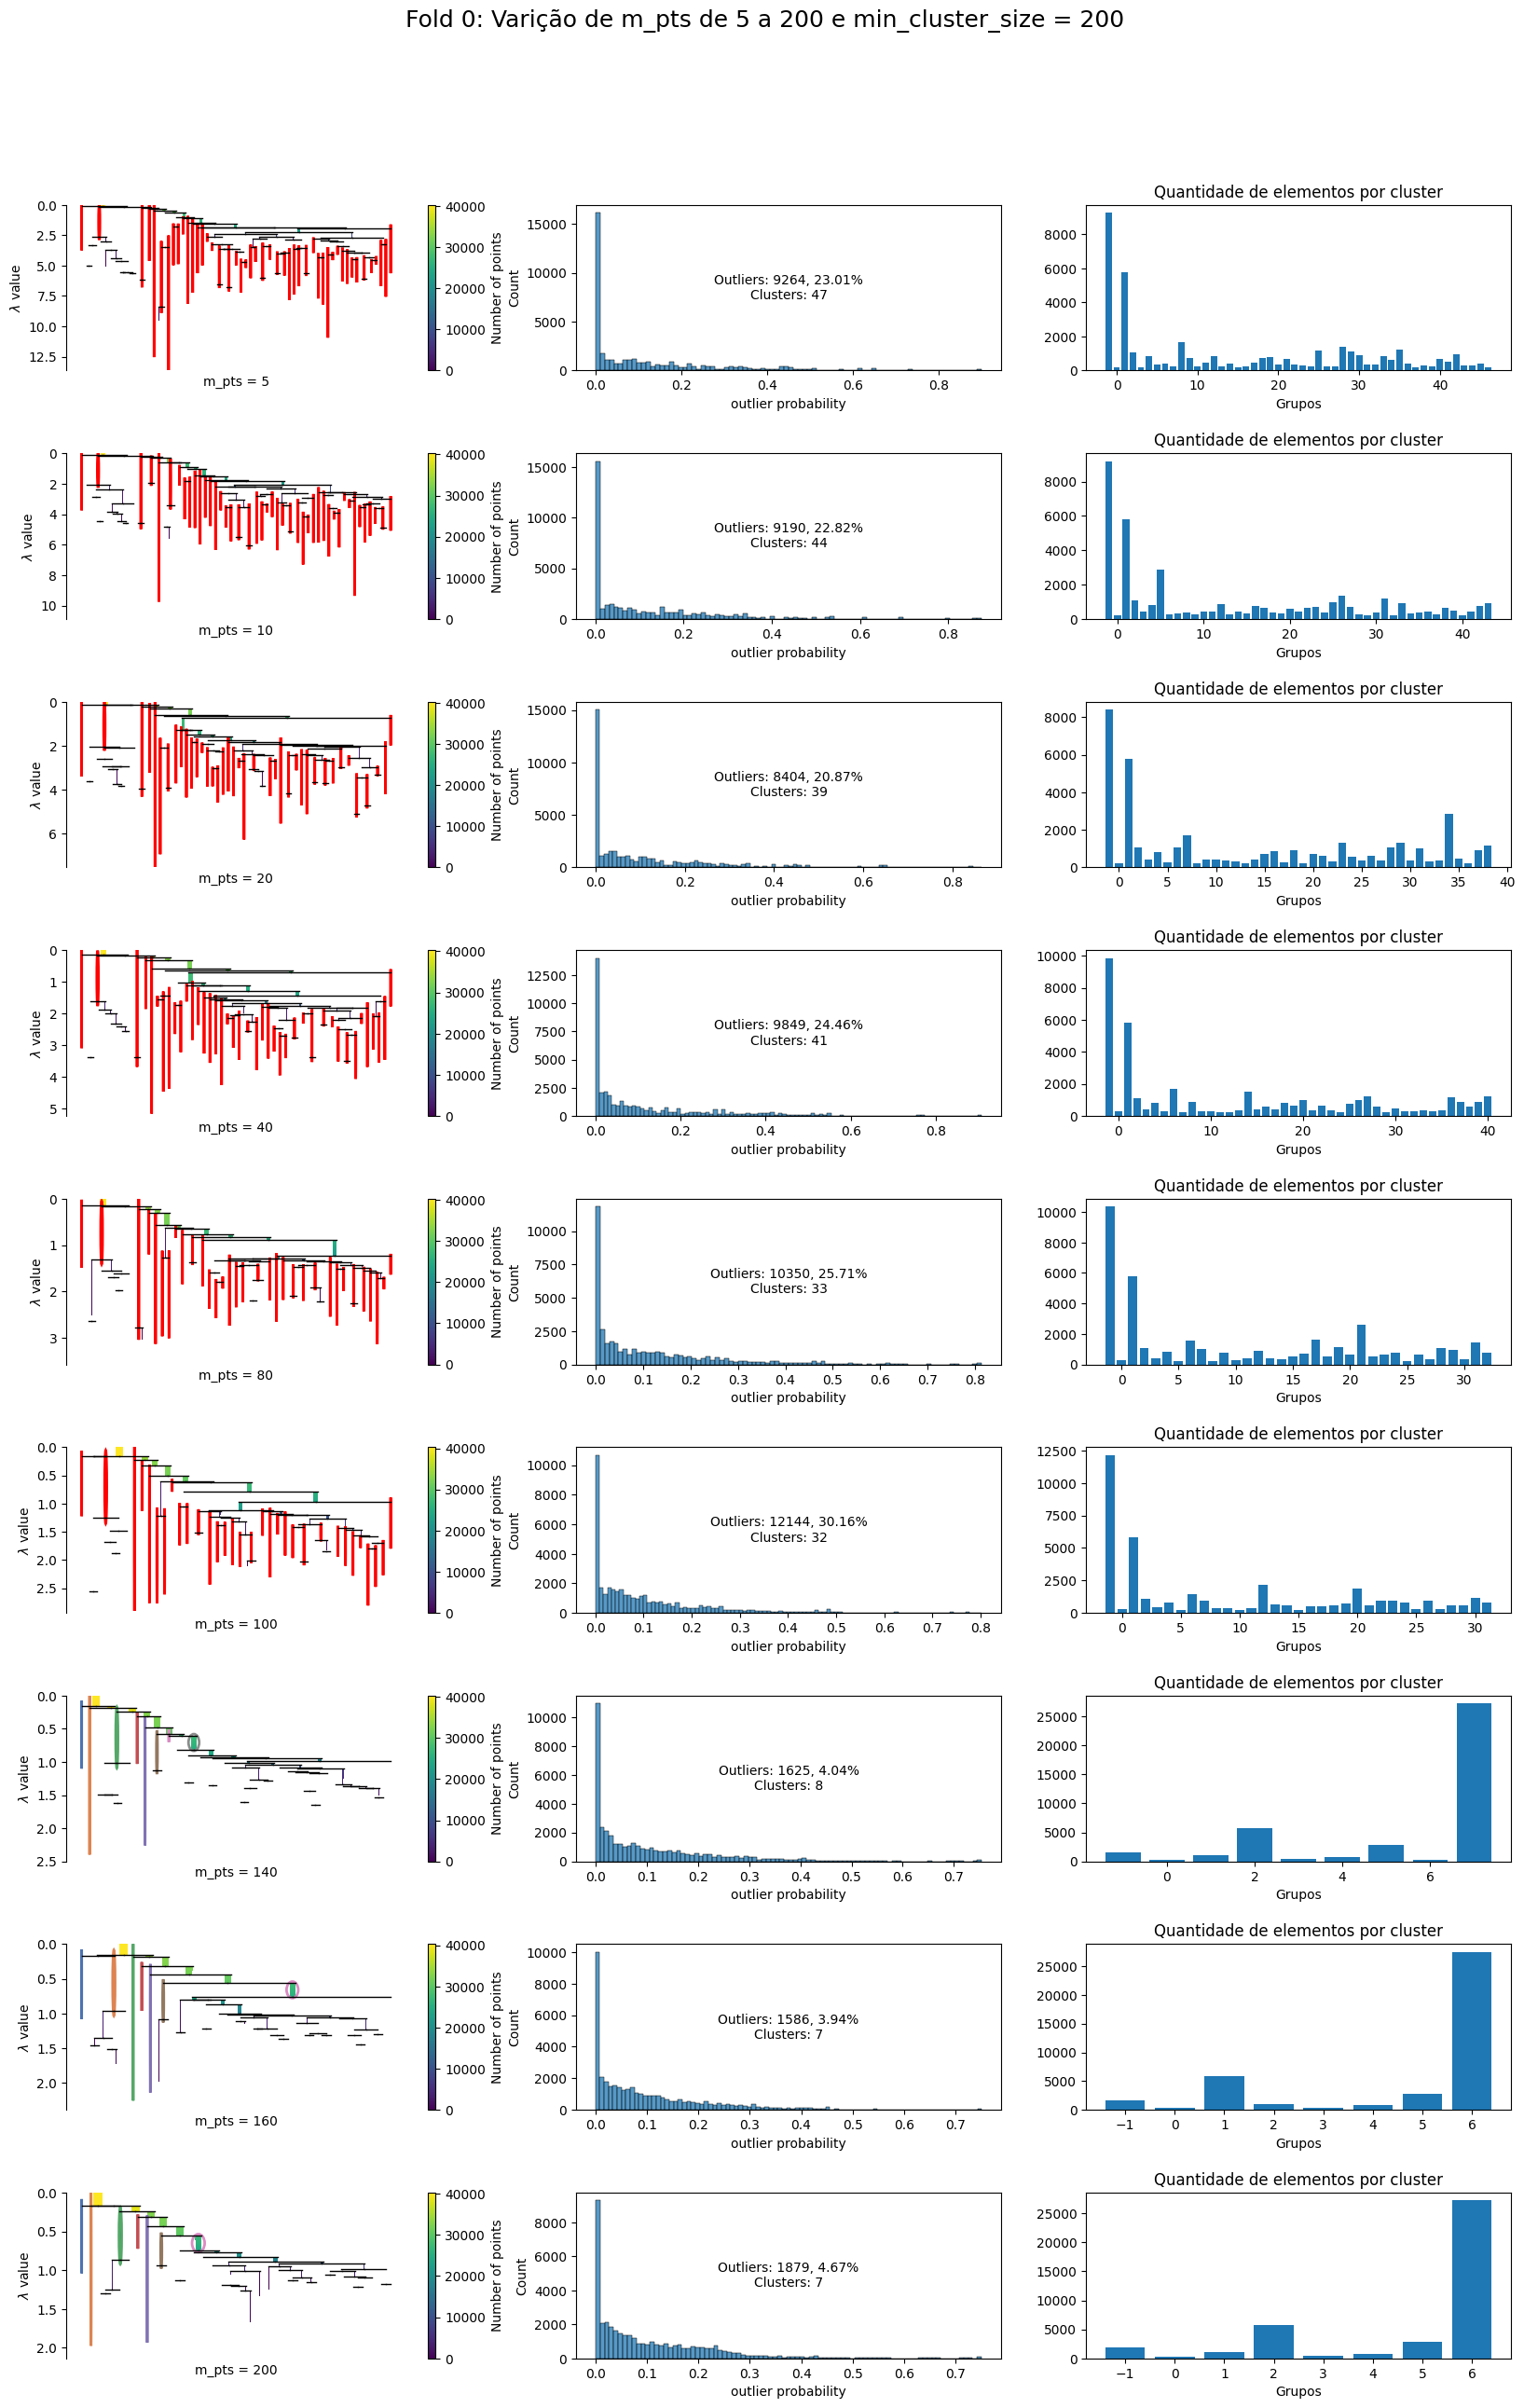

In [23]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == 0:
        print(f"Fold {i}:")
        print(f" Train: index={train_index}")
        print(f" Test: index={test_index}")
        print("----------------------------------")

        print("Aplicando o HDBSCAN nos dados")
        min_samples = 5
        min_cluster_size = 200
        cont = 1
        plt.figure(figsize=(20,30))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Fold {}: Varição de m_pts de 5 a {} e min_cluster_size = {}".format(i,min_cluster_size,min_cluster_size), fontsize=18, y=0.95)

        while (min_samples <= min_cluster_size):
            # HDBSCAN
            cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
            cluster.fit(dim10[train_index])

            # Dendogama condensado
            ax = plt.subplot(9,3,cont)
            cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',30))
            ax.set_xlabel("m_pts = {}".format(min_samples))
            
            # Detalhes sobre  os dados
            outliers = 0
            aux = []
            dicionario = {}
            labels = cluster.labels_
            num_dados = labels.shape[0]
            for label in labels:
                if label not in aux:
                    aux.append(label)
                    dicionario[label] = 1
                else:
                    for num in aux:
                        if num == label:
                            dicionario[label] += 1
                if label == -1:
                    outliers = outliers + 1
            sum = 0

            # Histograma de probabilidade de ser outlier
            ax = plt.subplot(9,3,cont+1)
            outlier_scores = cluster.outlier_scores_
            sns.histplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)])
            ax.set_xlabel("outlier probability")
            for x, Y in dicionario.items():
                if x == -1:
                    #print("São {} pontos outliers de {} de pontos no total.\n Há {} de outliers".format(y, x, 100*y/num_dados))
                    ax.text(0.5, 0.5, 'Outliers: {}, {:.2f}%\nClusters: {}'.format(Y,100*Y/num_dados,len(aux)-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                    sum += Y
                else:
                    #print("São {} pontos no grupo {}".format(y, x))
                    sum += Y
            
            # Histograma contendo a quantidade de elementos por cluster
            keys = list(dicionario.keys())
            keys.sort()
            dicionario_ordenado = {key: dicionario[key] for key in keys}
            keys, itens = zip(*dicionario_ordenado.items())
            ax = plt.subplot(9,3, cont+2)
            plt.bar(keys, itens)
            ax.set_title("Quantidade de elementos por cluster")
            ax.set_xlabel("Grupos")
            
            if(min_samples==80):
                min_samples = 100

            elif(min_samples==100):
                min_samples = 140

            elif(min_samples==140):
                min_samples = 160
            
            elif(min_samples==160):
                min_samples = 200

            else:
                min_samples = min_samples*2
                
            cont+=3

# Regressor geral e específico juntos

Fold 0:
 Train: index=[ 4474  4475  4476 ... 44734 44735 44736]
 Test: index=[   0    1    2 ... 4471 4472 4473]
--------------------------------------------------------------------------------
Aplicando o HDBSCAN nos dados
-------------------------------------------
Treinando o knn e o usando para definir os grupos dos pontos de teste
[ 6  6  6 ...  6 -1  6]
-------------------------------------------
Pontos por grupo de treino
{6: 27447, -1: 1586, 1: 5799, 5: 2838, 3: 407, 4: 823, 2: 1079, 0: 284}
--------------------------------------------------------------------------------
Pontos por grupo de teste
{6: 3334, 5: 14, 1: 522, -1: 604}
-----------------------------------------------------------------------------
Regressão
Regressão geral
MAD:  0.04788449932945915
RMSE:  0.06895150617936655
Regressor geral do fold 0: -10.984704442594643
Grupo 6:
RMSE:  0.05890932542395918
Score:  -8.697981772222763


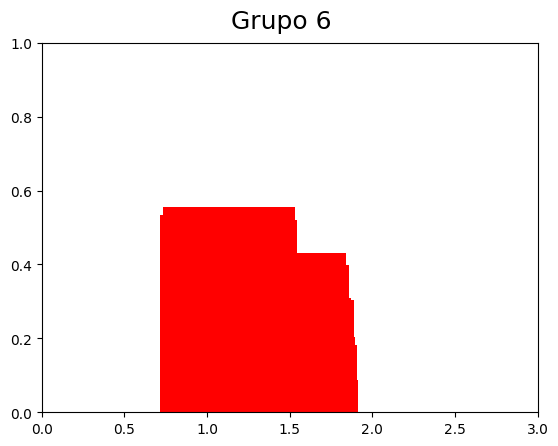

RMSE do grupo 6: 0.05890932542395918
RMSE do regressor geral do grupo 6: 0.05840835663143703


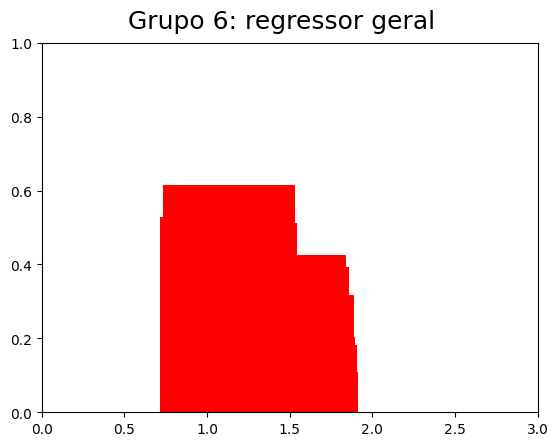

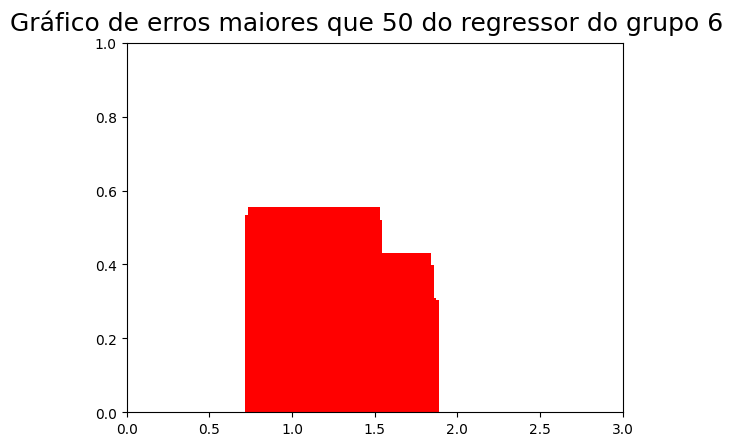

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300,dif
0,0.000000,0.0,0.5000,0.382920,0.274864,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.118,0.534108
0,0.000000,0.0,0.6150,0.460055,0.155515,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.133,0.555342
0,0.000000,0.0,0.5600,0.421488,0.213382,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.147,0.520093
0,0.205357,0.0,0.8050,0.490358,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.315,0.241929
0,0.205357,0.0,0.8075,0.490358,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.315,0.242204
0,0.205357,0.0,0.8050,0.490358,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.317,0.239241
0,0.203571,0.0,0.8000,0.490358,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.320,0.236062
0,0.223214,0.0,0.6200,0.512397,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.320,0.273729
0,0.203571,0.0,0.7975,0.490358,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.321,0.234775
0,0.267857,0.0,0.6250,0.341598,0.090416,0.0,0.000000,0.0,0.0,0.119617,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.348,0.290488


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Li,35.0,0.090867,0.104292,0.000000,0.000000,0.039286,0.198214,0.357143
Be,35.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B,35.0,0.686071,0.100247,0.500000,0.625000,0.695000,0.767500,0.900000
O,35.0,0.490043,0.088800,0.341598,0.454545,0.490358,0.526171,0.617080
Na,35.0,0.031310,0.066825,0.000000,0.000000,0.000000,0.000000,0.274864
...,...,...,...,...,...,...,...,...
Bi,35.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Th,35.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
U,35.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Grupo 5:
RMSE:  0.5408102666964327
Score:  -46.62051775894721


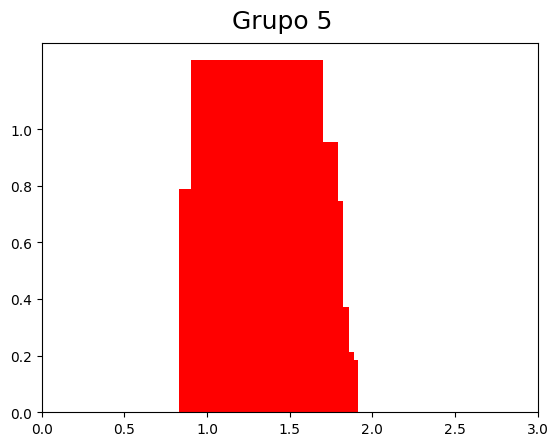

RMSE do grupo 5: 0.5408102666964327
RMSE do regressor geral do grupo 5: 0.5417660042068762


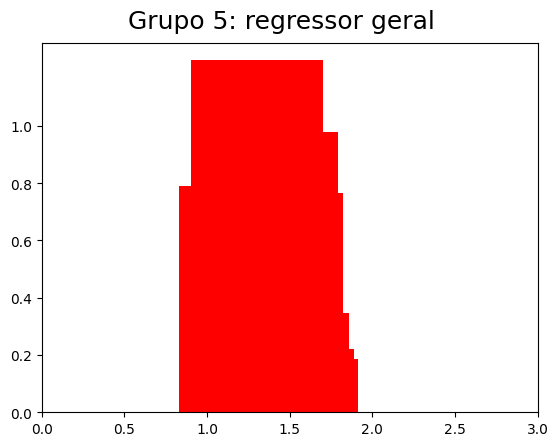

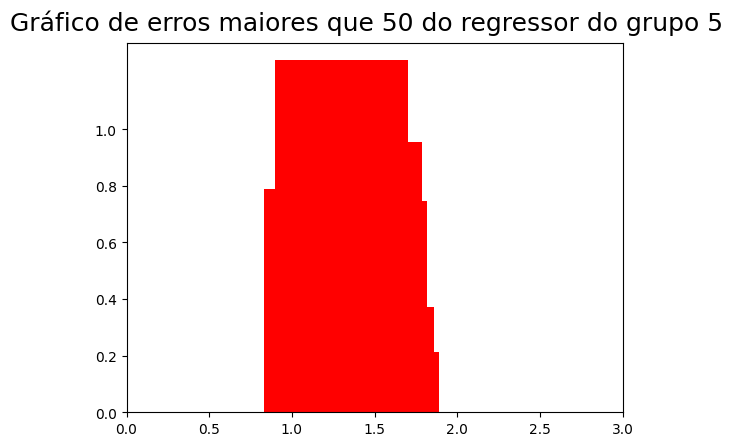

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300,dif
0,0.0,0.0,0.550,0.597796,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.075515,0.411765,0.0,0.0,1.230,0.788358
0,0.0,0.0,0.000,0.537190,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.311213,0.764706,0.0,0.0,1.300,1.243286
0,0.0,0.0,0.000,0.537190,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.276888,0.764706,0.0,0.0,1.390,0.955143
0,0.0,0.0,0.515,0.611570,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.022883,0.497326,0.0,0.0,1.420,0.747287
0,0.0,0.0,0.750,0.617080,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.160428,0.0,0.0,1.456,0.233734
0,0.0,0.0,0.000,0.537190,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.260870,0.764706,0.0,0.0,1.460,0.370735
0,0.0,0.0,0.000,0.801653,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.473,0.209809
0,0.0,0.0,0.000,0.746556,0.0,0.0,0.0,0.0,0.0,0.095694,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.490,0.212065


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Li,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Be,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B,8.0,0.226875,0.320367,0.000000,0.000000,0.000000,0.523750,0.750000
O,8.0,0.623278,0.100052,0.537190,0.537190,0.604683,0.649449,0.801653
Na,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Bi,8.0,0.420455,0.334384,0.000000,0.120321,0.454545,0.764706,0.764706
Th,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
U,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Grupo 1:
RMSE:  0.05985606772905286
Score:  -7.409076121715204


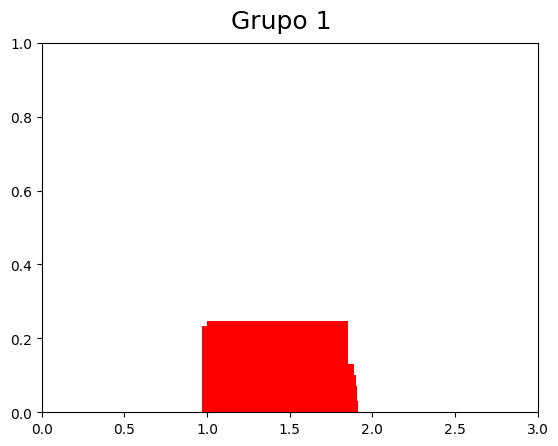

RMSE do grupo 1: 0.05985606772905286
RMSE do regressor geral do grupo 1: 0.0600667991374661


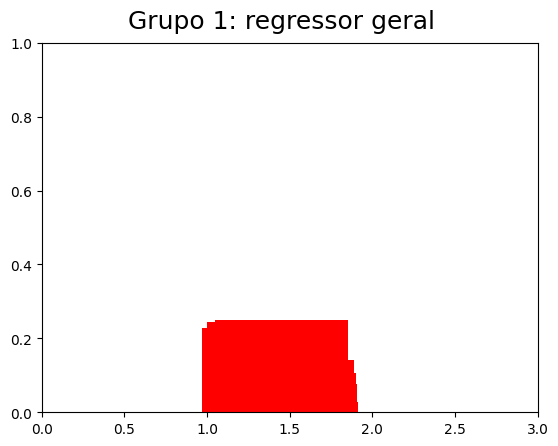

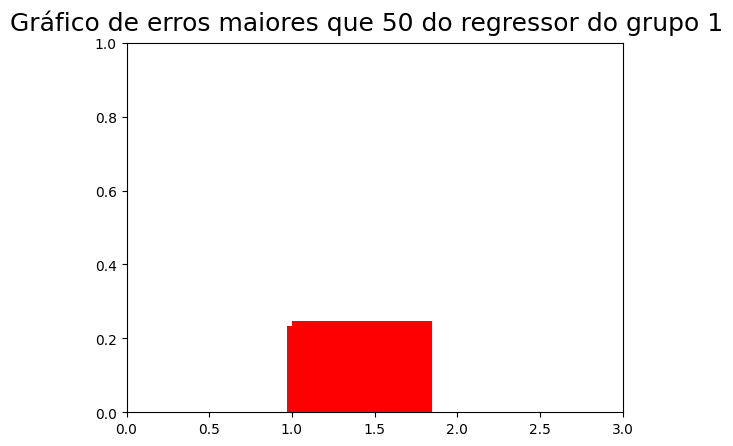

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Ta,W,Hg,Tl,Pb,Bi,Th,U,ND300,dif
0,0.000000,0.0,0.0,0.837466,0.0,0.0,0.0,0.0,0.839161,0.0,...,0.0,0.0,0.0,0.0,0.091533,0.0,0.0,0.0,1.37,0.232104
0,0.000000,0.0,0.0,0.834711,0.0,0.0,0.0,0.0,0.832168,0.0,...,0.0,0.0,0.0,0.0,0.091533,0.0,0.0,0.0,1.40,0.201419
0,0.250000,0.0,0.0,0.630854,0.0,0.0,0.0,0.0,0.650350,0.0,...,0.0,0.0,0.0,0.0,0.160183,0.0,0.0,0.0,1.40,0.247921
0,0.210714,0.0,0.0,0.650138,0.0,0.0,0.0,0.0,0.657343,0.0,...,0.0,0.0,0.0,0.0,0.162471,0.0,0.0,0.0,1.40,0.230345
0,0.151786,0.0,0.0,0.721763,0.0,0.0,0.0,0.0,0.744755,0.0,...,0.0,0.0,0.0,0.0,0.146453,0.0,0.0,0.0,1.40,0.213399
0,0.357143,0.0,0.0,0.617080,0.0,0.0,0.0,0.0,0.699301,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.40,0.216218
0,0.169643,0.0,0.0,0.669421,0.0,0.0,0.0,0.0,0.664336,0.0,...,0.0,0.0,0.0,0.0,0.162471,0.0,0.0,0.0,1.41,0.220072
0,0.128571,0.0,0.0,0.691460,0.0,0.0,0.0,0.0,0.674825,0.0,...,0.0,0.0,0.0,0.0,0.164760,0.0,0.0,0.0,1.42,0.216033
0,0.000000,0.0,0.0,0.754821,0.0,0.0,0.0,0.0,0.699301,0.0,...,0.0,0.0,0.0,0.0,0.171625,0.0,0.0,0.0,1.45,0.246009


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Li,9.0,0.140873,0.124596,0.000000,0.000000,0.151786,0.210714,0.357143
Be,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
O,9.0,0.711968,0.082451,0.617080,0.650138,0.691460,0.754821,0.837466
Na,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Bi,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Th,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
U,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Outliers:
MAD:  0.045810137446455686
RMSE:  0.07112139954922879
Score:  -17.010214311345216
Fold 0:
    MAD: 0.04506739508046269
    RMSE: 0.062176403079912776
    Score: -9.788436668932453
-----------------------------------------------------------------------------
MAD do regressor geral:  0.04788449932945915
RMSE do regressor geral:  0.06895150617936655
Score do regressor geral:  -10.984704442594643
MAD dos regresores específicos: 0.04506739508046269
RMSE dos regresores específicos: 0.062176403079912776
Score dos regresores específicos: -9.788436668932453


In [42]:
fold_scores = []
general_scores = []
fold_mads = []
general_mads = []
fold_rmses = []
general_rmses = []
for fold, (train_index, test_index) in enumerate(kf.split(dim10)):
    if fold == 0:
        print(f"Fold {fold}:")
        print(f" Train: index={train_index}")
        print(f" Test: index={test_index}")
        print("--------------------------------------------------------------------------------")

        print("Aplicando o HDBSCAN nos dados")
        cluster = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=160, prediction_data=True)
        cluster.fit(dim10[train_index])
        print("-------------------------------------------")

        print("Treinando o knn e o usando para definir os grupos dos pontos de teste")
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(dim10[train_index], cluster.labels_)
        test_labels = neigh.predict(dim10[test_index])
        print(test_labels)
        print("-------------------------------------------")

        print("Pontos por grupo de treino")
        outliers = 0
        aux = []
        dicionario = {}
        dict_train = {}
        train_labels = cluster.labels_
        num_dados = train_labels.shape[0]
        
        for indice, label in enumerate(train_labels):
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
                dict_train[label] = []
                dict_train[label].append(train_index[indice])
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
                        dict_train[label].append(train_index[indice])
            if label == -1:
                outliers = outliers + 1

        print(dicionario)
        print("--------------------------------------------------------------------------------")

        print("Pontos por grupo de teste")
        outliers = 0
        aux = []
        dicionario = {}
        dict_test = {}
        num_dados = test_labels.shape[0]
        
        for indice, label in enumerate(test_labels):
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
                dict_test[label] = []
                dict_test[label].append(test_index[indice])
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
                        dict_test[label].append(test_index[indice])
            if label == -1:
                outliers = outliers + 1

        print(dicionario)

        print("-----------------------------------------------------------------------------")
        print("Regressão")
        scores = []
        mads = []
        rmses = []
        weights = []

        print("Regressão geral")
        reg_geral = ensemble.RandomForestRegressor(max_features="sqrt")
        reg_geral.fit(dim10[train_index], y[train_index])

        # Cálculo do MAD
        prediction = reg_geral.predict(dim10[test_index])
        dif_module = abs(prediction - y[test_index])
        mad = dif_module.mean()
        general_mads.append(mad)
        print("MAD: ", mad)

        # Cálculo de RMSE
        residual = ((y[test_index] - prediction)** 2).mean()
        rmse = np.sqrt(residual)
        general_rmses.append(rmse)
        print("RMSE: ", rmse)

        # Cálculo do score
        score = reg_geral.score(dim10[test_index], y[test_index])
        general_scores.append(score)
        print(f"Regressor geral do fold {fold}: {score}")

        train_outliers_index = []
        test_outliers_index = []
        for value in enumerate(dict_test):
            grupo = value[1]
            if grupo != -1 and len(dict_train[grupo]) >= len(dict_train[-1]):
                plt.suptitle("Grupo {}".format(grupo), fontsize=18, y=0.95)

                print(f"Grupo {grupo}:")
                train_group_index = dict_train[grupo]
                regressor = ensemble.RandomForestRegressor(n_estimators=933, random_state = 0, n_jobs=-1, max_features="sqrt")
                regressor.fit(dim10[train_group_index], y[train_group_index])

                # Cálculo do MAD
                test_group_index = dict_test[grupo]
                prediction = regressor.predict(dim10[test_group_index])
                dif_module_group = abs(prediction - y[test_group_index])
                mad = dif_module_group.mean()
                mads.append(mad)

                # Cálculo de RMSE
                residual = ((y[test_group_index] - prediction)** 2).mean()
                rmse = np.sqrt(residual)
                rmses.append(rmse)
                print("RMSE: ", rmse)
                weight = len(test_group_index)/num_dados
                weights.append(weight)

                # Cálculo do score
                score = regressor.score(dim10[test_group_index], y[test_group_index])
                scores.append(score)
                print("Score: ", score)

                plt.bar(y[test_group_index], dif_module_group, color='red')
                plt.xticks([0,0.5,1,1.5,2,2.5,3])
                plt.yticks([0,0.2,0.4,0.6,0.8,1])
                plt.show()

                print("RMSE do grupo {}: {}".format(grupo,rmse))

                # Predição usando o regressor geral para os grupos específicos 
                prediction = reg_geral.predict(dim10[test_group_index])
                dif_module = abs(prediction - y[test_group_index])

                residual = (dif_module** 2).mean()
                rmse_geral = np.sqrt(residual)
                print("RMSE do regressor geral do grupo {}: {}".format(grupo,rmse_geral))

                plt.suptitle("Grupo {}: regressor geral".format(grupo), fontsize=18, y=0.95)
                plt.bar(y[test_group_index], dif_module, color='red')
                plt.xticks([0,0.5,1,1.5,2,2.5,3])
                plt.yticks([0,0.2,0.4,0.6,0.8,1])
                plt.show()

                # Dataframe com os vidros cujo erro é maior que 50
                elementos = []
                for i in dados_finais_sem_id:
                    elementos.append(i)
                elementos_df = pd.DataFrame(elementos)
                elementos_df = elementos_df.T

                objeto = dados_finais_sem_id[test_group_index[0]:(test_group_index[0]+1)][:].values.tolist()
                for linha,coluna in enumerate(objeto):
                    pass
                objeto = pd.DataFrame(coluna)
                objeto = objeto.T

                frames = [elementos_df,objeto]
                pontos_erro_grupo = pd.concat(frames, axis = 0, join = 'inner')

                pontos_erro_grupo= pontos_erro_grupo[0:1]

                dif_maior_02 = []
                for i,dif in enumerate(dif_module_group):
                    if dif >= 0.2:
                        dif_maior_02.append(dif)
                        objeto = dados_finais_sem_id[test_group_index[i]:(test_group_index[i]+1)][:].values.tolist()
                        for linha,coluna in enumerate(objeto):
                            pass
                        objeto = pd.DataFrame(coluna)
                        objeto = objeto.T
                        pontos_erro_grupo = pd.concat([pontos_erro_grupo,objeto], axis = 0, join='inner')
                        
                # Assign row as column headers
                header_row = 0
                pontos_erro_grupo.columns = pontos_erro_grupo.iloc[header_row]

                # Convert row to column header using DataFrame.iloc[]
                pontos_erro_grupo.columns = pontos_erro_grupo.iloc[0]
                pontos_erro_grupo = pontos_erro_grupo[1:]

                pontos_erro_grupo['dif'] = dif_maior_02

                pontos_erro_grupo = pontos_erro_grupo.apply(pd.to_numeric)

                plt.suptitle("Gráfico de erros maiores que 50 do regressor do grupo {}".format(grupo), fontsize=18, y=0.95)
                plt.bar(pontos_erro_grupo['ND300'], dif_maior_02, color='red')
                plt.xticks([0,0.5,1,1.5,2,2.5,3])
                plt.yticks([0,0.2,0.4,0.6,0.8,1])
                plt.show()

                display(pontos_erro_grupo)

                dataset_transposed = pontos_erro_grupo.describe()
                display(dataset_transposed.transpose()) #facilita a visualização

            else:
                train_group_index = dict_train[grupo]
                train_outliers_index.append(train_group_index)

                test_group_index = dict_test[grupo]
                test_outliers_index.append(test_group_index)

        print("Outliers:")

        train_outliers_index_ordenado = []
        for i, lista in enumerate(train_outliers_index):
            for item in lista:
                train_outliers_index_ordenado.append(item)
        train_outliers_index_ordenado.sort()

        test_outliers_index_ordenado = []
        for i, lista in enumerate(test_outliers_index):
            for item in lista:
                test_outliers_index_ordenado.append(item)
        test_outliers_index_ordenado.sort()

        # Pesos para o cálculo das métricas ponderadamente
        weight = len(test_outliers_index_ordenado)/num_dados
        weights.append(weight)

        # Regressor geral para os outliers
        reg_geral.fit(dim10[train_outliers_index_ordenado], y[train_outliers_index_ordenado])
        prediction = reg_geral.predict(dim10[test_outliers_index_ordenado])

        # Cálculo do MAD
        dif_module = abs(prediction - y[test_outliers_index_ordenado])
        mads.append(mad)
        print("MAD: ", mad)
        
        # Cálculo de RMSE
        residual = ((y[test_outliers_index_ordenado] - prediction)** 2).mean()
        rmse = np.sqrt(residual)
        rmses.append(rmse)
        print("RMSE: ", rmse)

        # Cálculo do score
        score = reg_geral.score(dim10[test_outliers_index_ordenado], y[test_outliers_index_ordenado])
        scores.append(score)
        print("Score: ", score)

        fold_mad = np.multiply(np.array(mads), np.array(weights)).sum()
        fold_mads.append(fold_mad)
        fold_rmse = np.multiply(np.array(rmses), np.array(weights)).sum()
        fold_rmses.append(fold_rmse)
        fold_score = np.multiply(np.array(scores), np.array(weights)).sum()
        fold_scores.append(fold_score)
        print("Fold {}:".format(fold))
        print("    MAD: {}".format(fold_mad))
        print("    RMSE: {}".format(fold_rmse))
        print("    Score: {}".format(fold_score)) 
        print("-----------------------------------------------------------------------------")

fold_mads_mean = np.array(fold_mads).mean()
fold_rmses_mean = np.array(fold_rmses).mean()
fold_scores_mean = np.array(fold_scores).mean()
print("MAD do regressor geral: ", np.array(general_mads).mean())
print("RMSE do regressor geral: ", np.array(general_rmses).mean())
print("Score do regressor geral: ", np.array(general_scores).mean())
print("MAD dos regresores específicos:", fold_mads_mean)
print("RMSE dos regresores específicos:", fold_rmses_mean)
print("Score dos regresores específicos:", fold_scores_mean)

In [35]:
print(dim10[train_index].shape)

(40263, 10)


In [36]:
print(y[train_index].shape)

(40263,)


In [39]:
print(prediction)
print(y[test_index])
print(prediction-y[test_index])

[1.64607 1.68457 1.65026 ... 1.51472 1.51833 1.52742]
[1.118 1.133 1.147 ... 1.51  1.51  1.51 ]
[0.52807 0.55157 0.50326 ... 0.00472 0.00833 0.01742]
